<h1>Studienarbeit: Predictive Analytics</h1>
<b>Personen:</b> Luise Fabich / Vinh-Phnong Nguyen / Marc Willberg

<h2>Vorhersage des Trinkgelds der gelben Taxis in New York anhand von verschiedenen Faktoren:</h2>
Ziel ist es, ein Modell zu entwickeln, das die zu erwartenden Trinkgelder auf der Grundlage verschiedener Faktoren wie Fahrtdauer, Tageszeit und Zielort vorhersagt. Die Datenbasis bildet hierbei die Taxifahrten der gelben Taxis in New York aus dem Jahr 2023.

<h1>Laden der Datensätze:</h1>
<p>Die zu analysierenden Daten sind unter der folgenden Webseite zu finden:</p>
<p>Page: <a href="https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page" target="_blank">TLC Trip Record Data</a></p>

In [5]:
import os

year = 2023

# Laden des Verzeichnisses
path = f'C:\\Users\\Marc Willberg\\Studienarbeit_Predictive_Analytics\\Data_Taxi_Trip_NY'
year_directory = os.path.join(path, f'{year}')

# Ausgabe aller gefundenen .parquet-Dateien
print("Folgende Daten wurden gefunden:")
parquet_files = [os.path.join(year_directory, file) for file in os.listdir(year_directory) if file.endswith('.parquet')]
for file in parquet_files:
    print(file)

Folgende Daten wurden gefunden:
C:\Users\Marc Willberg\Studienarbeit_Predictive_Analytics\Data_Taxi_Trip_NY\2023\yellow_tripdata_2023-01.parquet
C:\Users\Marc Willberg\Studienarbeit_Predictive_Analytics\Data_Taxi_Trip_NY\2023\yellow_tripdata_2023-02.parquet
C:\Users\Marc Willberg\Studienarbeit_Predictive_Analytics\Data_Taxi_Trip_NY\2023\yellow_tripdata_2023-03.parquet
C:\Users\Marc Willberg\Studienarbeit_Predictive_Analytics\Data_Taxi_Trip_NY\2023\yellow_tripdata_2023-04.parquet
C:\Users\Marc Willberg\Studienarbeit_Predictive_Analytics\Data_Taxi_Trip_NY\2023\yellow_tripdata_2023-05.parquet
C:\Users\Marc Willberg\Studienarbeit_Predictive_Analytics\Data_Taxi_Trip_NY\2023\yellow_tripdata_2023-06.parquet
C:\Users\Marc Willberg\Studienarbeit_Predictive_Analytics\Data_Taxi_Trip_NY\2023\yellow_tripdata_2023-07.parquet
C:\Users\Marc Willberg\Studienarbeit_Predictive_Analytics\Data_Taxi_Trip_NY\2023\yellow_tripdata_2023-08.parquet
C:\Users\Marc Willberg\Studienarbeit_Predictive_Analytics\Data_T


<h2>Einsicht auf Rohdaten:</h2>
<p>Für einen Einblick der Rohdaten werden aus der ersten Datei die ersten 5 Spalten geladen.</p>
<p>Erklärung der Datensätze: <a href="https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf" target="_blank">Data Dictionary – Yellow Taxi Trip Records</a></p>



In [6]:
from IPython.display import display
import pandas as pd

# Laden der ersten .parquet-Datei
first_file = parquet_files[0]
df = pd.read_parquet(first_file)

# Anzeige der ersten 7 Spalten
df_head = df.iloc[:5, :].T
display(df_head)

,0,1,2,3,4
VendorID,2,2,2,1,2
tpep_pickup_datetime,2023-01-01 00:32:10,2023-01-01 00:55:08,2023-01-01 00:25:04,2023-01-01 00:03:48,2023-01-01 00:10:29
tpep_dropoff_datetime,2023-01-01 00:40:36,2023-01-01 01:01:27,2023-01-01 00:37:49,2023-01-01 00:13:25,2023-01-01 00:21:19
passenger_count,1.0,1.0,1.0,0.0,1.0
trip_distance,0.97,1.1,2.51,1.9,1.43
RatecodeID,1.0,1.0,1.0,1.0,1.0
store_and_fwd_flag,N,N,N,N,N
PULocationID,161,43,48,138,107
DOLocationID,141,237,238,7,79
payment_type,2,1,1,1,1


<h2>Größe der Datensätze:</h2>
Um einen ersten Überblick über die relevanten Größen zu erhalten, werden die Datengrößen zunächst analysiert. Um einen groben Eindruck zu erhalten wird hierfür der <b>Mai des Jahres 2023</b> betrachtet.
Es wird erkenntlich das pro Monat ca. 3 Millionen Fahrten gemacht werden. Dies entspricht ca. 100.000 Fahrten pro Tag.

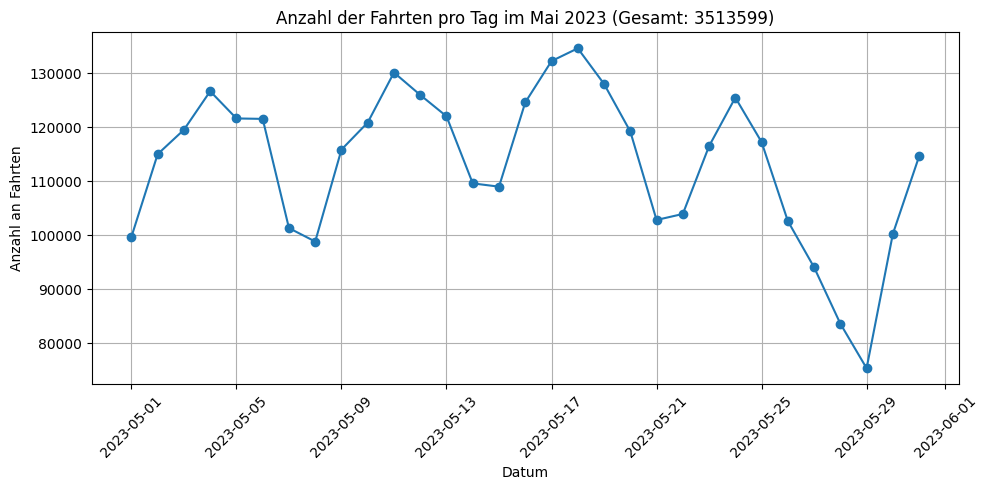

In [7]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import timedelta, date
import calendar

def counts_day_trips_for_month(data, year, month):
    start_date = date(year, month, 1)
    end_date = date(year, month, calendar.monthrange(year, month)[1])

    # Konvertierung der Datumsspalte
    data['tpep_pickup_datetime'] = data['tpep_pickup_datetime'].dt.date

    # Initialisierung der Liste für die Ergebnisse
    count_list = []

    # Durchlauf der Daten und Aufteilung in Tagen
    for current_date in pd.date_range(start_date, end_date):
        count = (data['tpep_pickup_datetime'] == current_date.date()).sum()
        count_list.append((current_date.date(), count))

    return count_list

# Auswahl Monat, Jahr, Pfad
month = 5
year = 2023
path = 'C:\\Users\\Marc Willberg\\Studienarbeit_Predictive_Analytics\\Data_Taxi_Trip_NY\\2023\\yellow_tripdata_2023-05.parquet'

# Daten laden des Monats
data = pd.read_parquet(path)

# Laden der Fahrten je Tage
list_day_trips = counts_day_trips_for_month(data, year, month)

# Gesamtanzahl der Fahrten
total_trips = sum(item[1] for item in list_day_trips)

# Chart
x_data = [item[0] for item in list_day_trips]
y_data = [item[1] for item in list_day_trips]
plt.figure(figsize=(10, 5))
plt.plot(x_data, y_data, marker='o', linestyle='-')
plt.title(f'Anzahl der Fahrten pro Tag im Mai 2023 (Gesamt: {total_trips})')
plt.xlabel('Datum')
plt.ylabel('Anzahl an Fahrten')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<h2>Vorbereitung der Daten:</h2>
Zunächst werden die Daten vorbereitet um Algorithmen auf diesen anzuwenden.

In [8]:
class TaxiTripFeatures:
    def __init__(self, travel_time,start_month, start_day, start_hour, weekday, passenger_count, trip_distance, PULocationID, DOLocationID, tip_amount, total_amount_without_tip):
        self.travel_time = travel_time                           #Fahrtzeit in Sekunden
        self.start_day = start_day                               #Tag in dem das Taxi gestartet hat
        self.start_hour = start_hour                             #Stunde in dem das Taxi gestartet hat
        self.weekday = weekday                                   #Wochentag als int in dem das Taxi gestartet hat
        self.passenger_count = passenger_count                   #Anzahl der Passagiere
        self.trip_distance = trip_distance                       #Fahrtdistanz in Meilen 
        self.PULocationID = PULocationID                         #StartID Standort
        self.DOLocationID = DOLocationID                         #ZielID Standort
        self.tip_amount = tip_amount                             #Trinkgeld
        self.total_amount_without_tip = total_amount_without_tip #Gesamtbetrag ohne Trinkgeld

    def __repr__(self):
        return (f"TaxiTripFeatures(travel_time={self.travel_time}, start_day={self.start_day}, "
                f"start_hour={self.start_hour}, weekday={self.weekday}, passenger_count={self.passenger_count}, "
                f"trip_distance={self.trip_distance}, PULocationID={self.PULocationID}, DOLocationID={self.DOLocationID}, "
                f"tip_amount={self.tip_amount}, total_amount_without_tip={self.total_amount_without_tip})")

<h2>Analyse der Datengröße:</h2>

<h3>Laden der gesamten Daten:</h3>
Um eine gute Stichprobe der Datensätze zu ermitteln werden zunächst alle Datensätze benötigt. Hierzu ist zu beachten das nur Datensätze geladen werden die nicht leer sind und wo mit Kreditkarte gezahlt wurde. Dies hat den Grund da bei Bahrzahlung das Trinkgeld nicht angegeben wurde.

In [9]:
import pandas as pd
from concurrent.futures import ThreadPoolExecutor, as_completed
import time
import random

def load_features_from_file(file_path):
    data = pd.read_parquet(file_path, engine='auto')
    data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
    data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])
    
    # Filter data to include only credit card payments and drop rows with any missing values
    data = data[data['payment_type'] == 1].dropna()

    # Drop rows with any missing values
    data = data.dropna()

    features = [
        TaxiTripFeatures(
            (row['tpep_dropoff_datetime'] - row['tpep_pickup_datetime']).total_seconds(),
            row['tpep_pickup_datetime'].month,
            row['tpep_pickup_datetime'].day,
            row['tpep_pickup_datetime'].hour,
            row['tpep_pickup_datetime'].weekday(),
            row['passenger_count'],
            row['trip_distance'],
            row['PULocationID'],
            row['DOLocationID'],
            row['tip_amount'],
            row['total_amount'] - row['tip_amount']
        ) for _, row in data.iterrows()
    ]
    
    return features

# Wähle eine zufällige Datei aus der Liste
random_file = random.choice(parquet_files)
print(f"Zufällig ausgewählte Datei: {random_file}")

# Lade alle Daten aus der zufällig ausgewählten Datei
start_time = time.time()
features_list = load_features_from_file(random_file)
end_time = time.time()

print(f"\nData loading complete! Total time taken: {end_time - start_time:.2f} seconds.")
print(f"Anzahl geladener Datensätze: {len(features_list)}")


Zufällig ausgewählte Datei: C:\Users\Marc Willberg\Studienarbeit_Predictive_Analytics\Data_Taxi_Trip_NY\2023\yellow_tripdata_2023-05.parquet

Data loading complete! Total time taken: 243.62 seconds.
Anzahl geladener Datensätze: 2758133


<h3>Festlegung der Strichprobe:</h3>
Für die nächsten Schritte wird aus dem Jahr 2023 ein Monatsdatensatz als Stichprobe verwendet. Dies ermöglicht es, effizient Muster und Trends zu analysieren, ohne das gesamte Jahr betrachten zu müssen. Ein einzelner Monat bietet ausreichend Daten, um eine gute Aussage im Vergleich zu anderen Monaten zu treffen. Als Stichprobe betrachten wir 7% der Daten. Dies sollte pro Monat eine Stichprobengröße von ca. 200.000 Datensätzen ergeben.


In [19]:
import pandas as pd
import time

# Konvertieren der Liste von TaxiTripFeatures-Objekten in einen DataFrame
data = pd.DataFrame([vars(feature) for feature in features_list])

# Funktion zum Ziehen von Stichproben
def sample_data_per_day(data, sample_percentage=0.07):
    # Berechne die Anzahl der Fahrten pro Tag
    grouped = data.groupby('start_day')
    
    # Funktion zum Ziehen von 7% der Fahrten pro Tag
    def sample_group(x):
        sample_size = int(len(x) * sample_percentage)
        return x.sample(n=sample_size, random_state=42)
    
    # Ziehen der Stichprobe
    sampled_data = grouped.apply(sample_group, include_groups=False).reset_index(drop=True)
    return sampled_data

# Ziehen der Stichprobe
start_time = time.time()
sampled_data = sample_data_per_day(data)
end_time = time.time()

# Ausgabe der Zeit und Anzahl der Datensätze
print(f"\nStichprobenermittlung abgeschlossen! Gesamtzeit: {end_time - start_time:.2f} Sekunden.")
print(f"Anzahl der Stichprobendatensätze: {len(sampled_data)}")

# Anzeigen der ersten 6 Daten in transponierter Form
df_head = sampled_data.head(10).T
display(df_head)



Stichprobenermittlung abgeschlossen! Gesamtzeit: 0.38 Sekunden.
Anzahl der Stichprobendatensätze: 193056


,0,1,2,3,4,5,6,7,8,9
travel_time,1419.0,1034.00,1982.0,1634.00,289.00,613.00,1085.00,1409.00,621.00,410.00
start_hour,17.0,18.00,18.0,16.00,14.00,9.00,6.00,20.00,7.00,19.00
weekday,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
passenger_count,0.0,1.00,1.0,1.00,1.00,1.00,2.00,1.00,1.00,1.00
trip_distance,2.7,2.12,2.0,2.32,0.79,1.78,5.47,5.71,1.71,0.91
PULocationID,246.0,90.00,163.0,161.00,262.00,236.00,142.00,162.00,229.00,142.00
DOLocationID,163.0,163.00,236.0,236.00,140.00,239.00,13.00,116.00,164.00,142.00
tip_amount,3.5,4.56,3.0,3.00,2.10,2.42,7.52,6.50,1.00,2.88
total_amount_without_tip,24.9,22.80,34.0,29.80,10.50,16.10,30.10,32.50,16.10,14.40


<h3>Überprüfung der Stichprobe:</h3> Stichprobe wird auf Varianz und Divesität geprüft. Dies ist notwendig um Sicherzustellen ob die Stichprobe die gesamten Datenmengen gut abbildet.

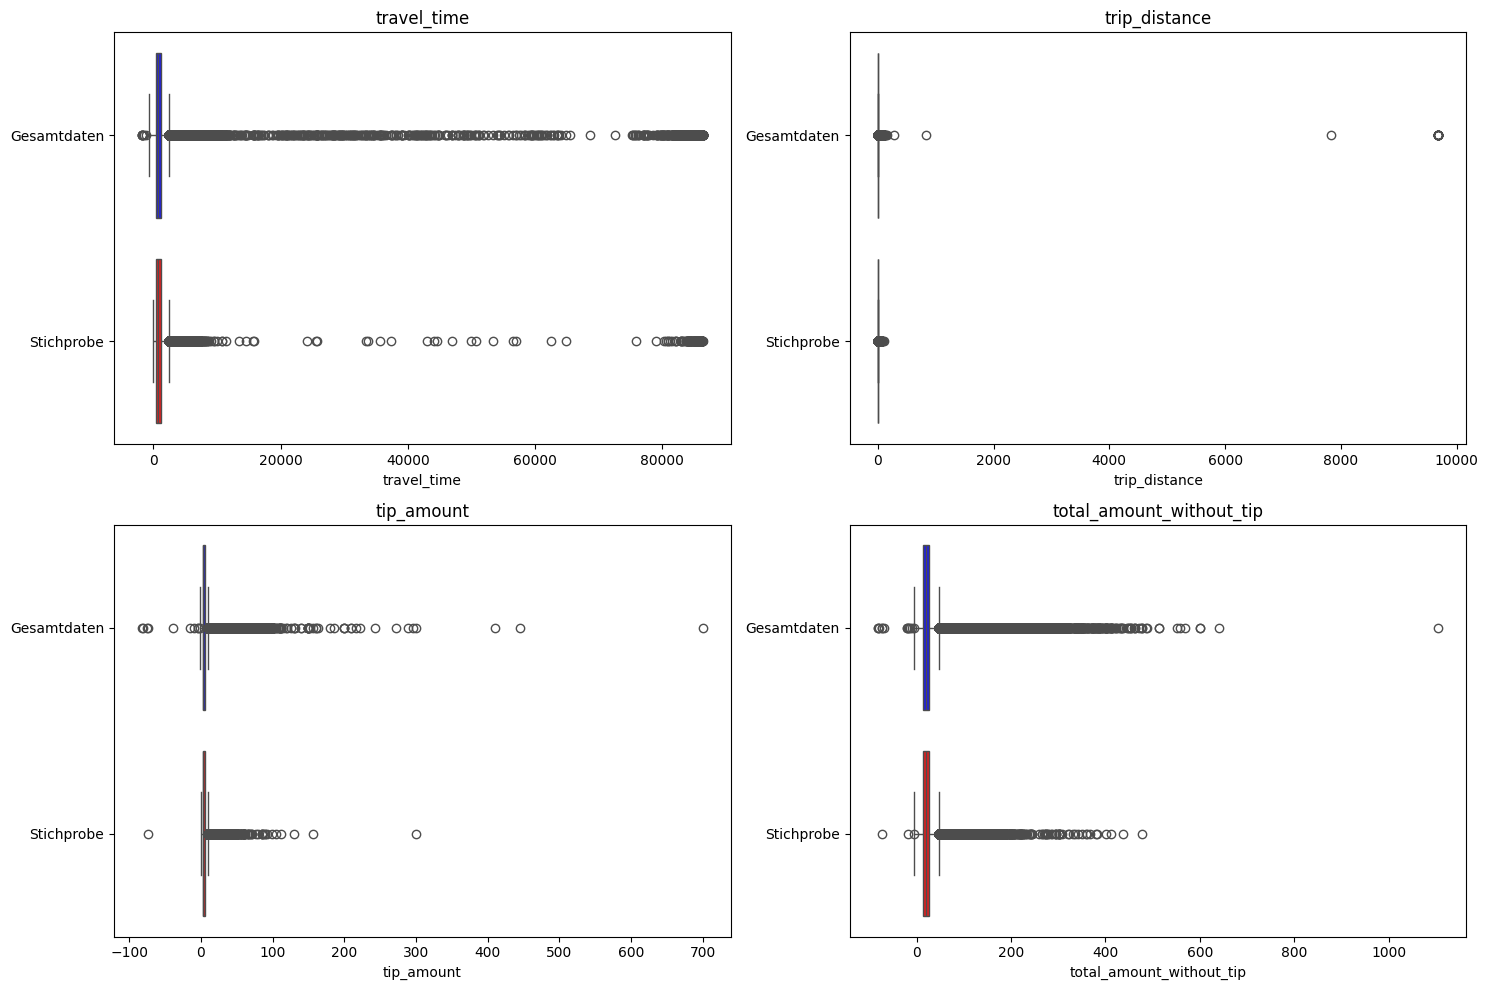

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Funktion zur Visualisierung der Verteilung und Diversität in Boxplots
def plot_boxplots(data, sampled_data, features, cols=2):
    rows = (len(features) + cols - 1) // cols  # Anzahl der benötigten Reihen
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        combined_data = pd.concat([data[feature], sampled_data[feature]], axis=1)
        combined_data.columns = ['Gesamtdaten', 'Stichprobe']
        sns.boxplot(data=combined_data, orient='h', palette=['blue', 'red'], ax=axes[i])
        axes[i].set_title(f'{feature}')
        axes[i].set_xlabel(feature)

    # Entfernen der leeren Subplots
    for i in range(len(features), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

# Visualisierung der Verteilungen
continuous_features = ['travel_time', 'trip_distance', 'tip_amount', 'total_amount_without_tip']
plot_boxplots(data, sampled_data, continuous_features, cols=2)


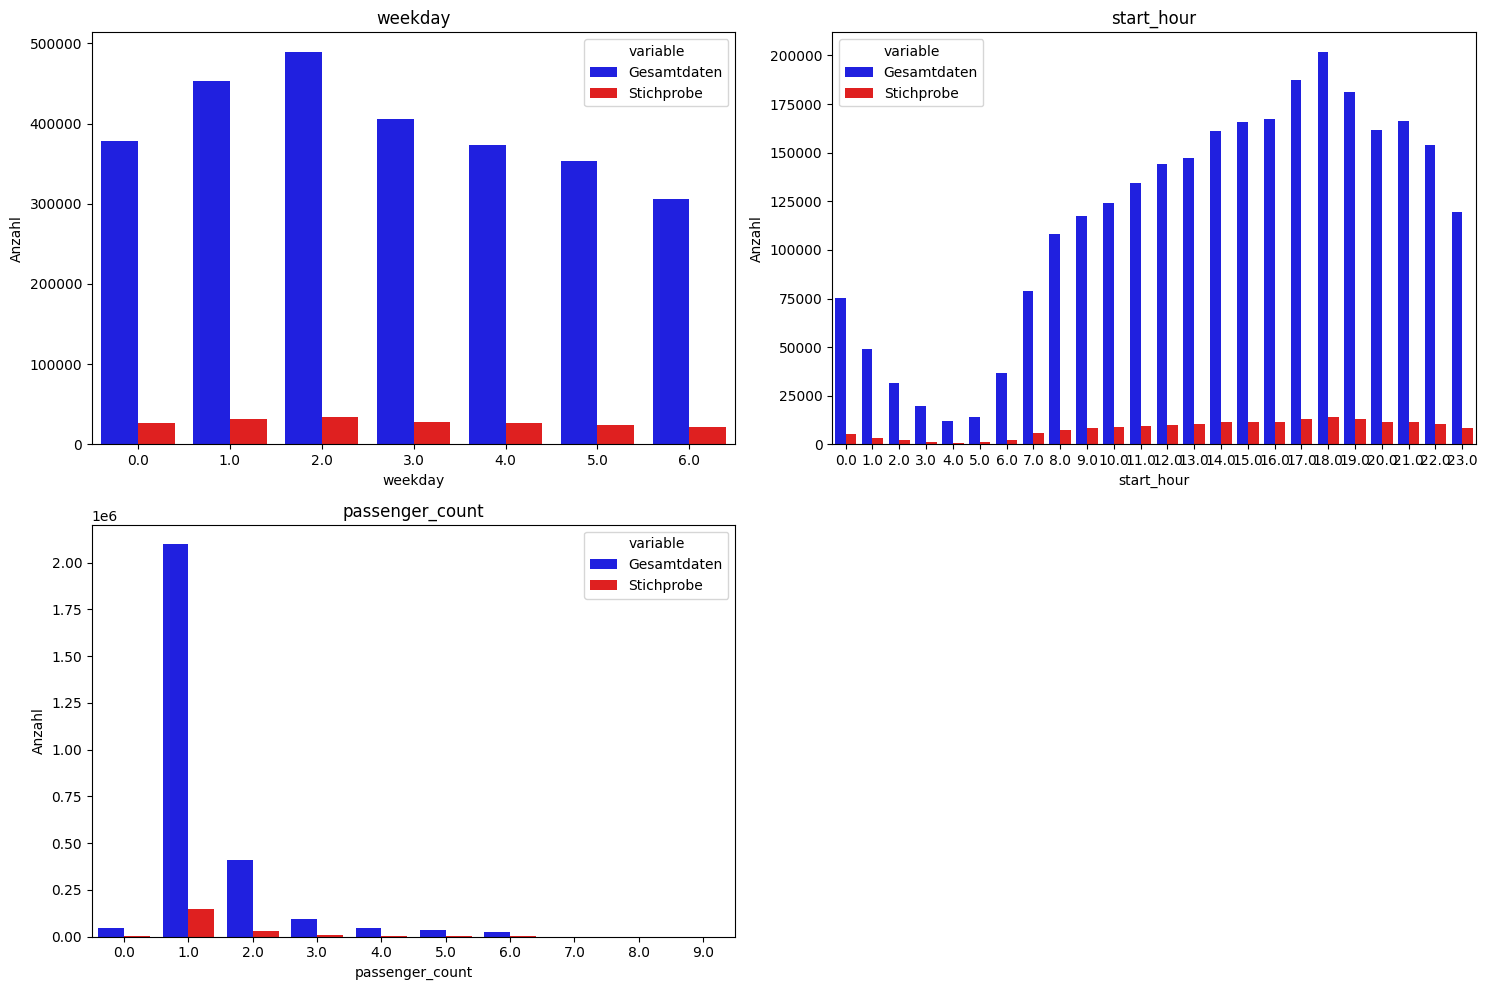

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Funktion zur Visualisierung der Verteilung und Diversität in Countplots für kategoriale Variablen
def plot_countplots(data, sampled_data, features, cols=2):
    rows = (len(features) + cols - 1) // cols  # Anzahl der benötigten Reihen
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        combined_data = pd.concat([data[feature], sampled_data[feature]], axis=1)
        combined_data.columns = ['Gesamtdaten', 'Stichprobe']
        sns.countplot(data=pd.melt(combined_data), x='value', hue='variable', ax=axes[i], palette=['blue', 'red'])
        axes[i].set_title(f'{feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Anzahl')

    # Entfernen der leeren Subplots
    for i in range(len(features), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

# Visualisierung der Verteilungen für kategoriale Variablen
categorical_features = ['weekday', 'start_hour', 'passenger_count']
plot_countplots(data, sampled_data, categorical_features, cols=2)


<h1>Lieare Regression:</h1>

Mean Squared Error (MSE): 7.93
R^2 Score: 0.55
Koeffizienten: [-1.02100313e-05  9.07772461e-03 -1.89788657e-02  2.43197121e-02
  1.13900167e-01  1.33125113e-01]


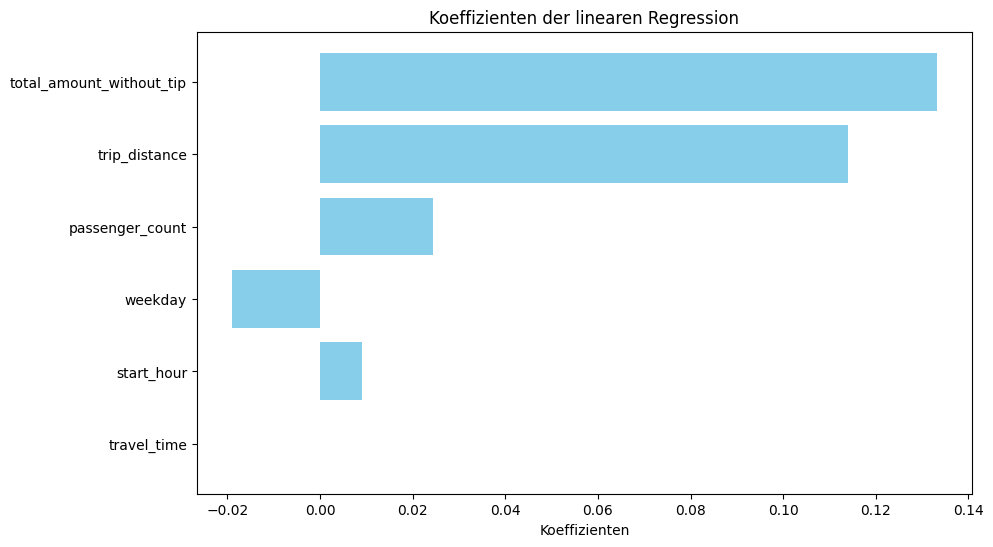

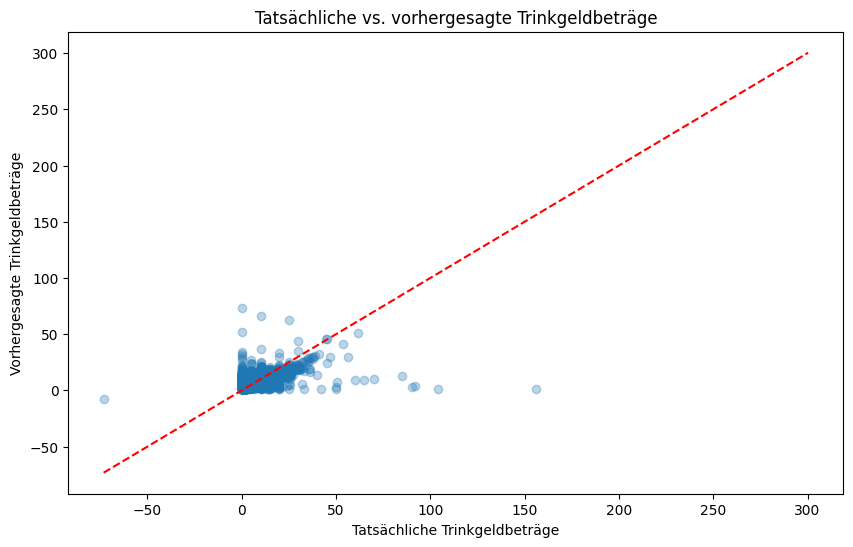

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Nur numerische Features für die lineare Regression auswählen
features = ['travel_time', 'start_hour', 'weekday', 'passenger_count', 'trip_distance', 'total_amount_without_tip']
X = sampled_data[features]
y = sampled_data['tip_amount']

# Aufteilen der Daten in Trainings- und Testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lineares Regressionsmodell erstellen und trainieren
model = LinearRegression()
model.fit(X_train, y_train)

# Vorhersagen auf dem Testset durchführen
y_pred = model.predict(X_test)

# Modellbewertung
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Koeffizienten des Modells ausgeben
coefficients = model.coef_
print("Koeffizienten:", coefficients)

# Visualisierung der Koeffizienten
plt.figure(figsize=(10, 6))
plt.barh(features, coefficients, color='skyblue')
plt.xlabel("Koeffizienten")
plt.title("Koeffizienten der linearen Regression")
plt.show()

# Visualisierung der Vorhersagen vs. tatsächliche Werte
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Tatsächliche Trinkgeldbeträge")
plt.ylabel("Vorhergesagte Trinkgeldbeträge")
plt.title("Tatsächliche vs. vorhergesagte Trinkgeldbeträge")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.show()


Die rote gestrichelte Linie ist die 45-Grad-Linie, die eine perfekte Übereinstimmung zwischen den vorhergesagten und den tatsächlichen Werten repräsentiert.

Der R²-Score von 0.55 und der MSE von 7.93 deuten darauf hin, dass das Modell eine moderate Leistung hat. Es kann einen signifikanten Teil der Varianz in den Trinkgeldbeträgen erklären, aber es gibt immer noch viel Raum für Verbesserungen.
Die Verteilung der Punkte zeigt, dass es einige systematische Fehler geben könnte, die weiter untersucht werden sollten.

Die meisten Punkte liegen nahe der roten Linie, was bedeutet, dass die vorhergesagten Werte ziemlich nah an den tatsächlichen Werten liegen. Dies ist ein gutes Zeichen für die Modellanpassung.
Es gibt jedoch einige Punkte, die weit von der roten Linie entfernt sind, was auf große Fehler in den Vorhersagen hinweist. Dies kann auf Ausreißer oder komplexe Beziehungen hinweisen, die das Modell nicht gut erfassen kann

Koeffizienten:
Dies sind die Gewichte der einzelnen Features im linearen Regressionsmodell. Sie zeigen die Richtung und Stärke des Einflusses jedes Features auf das Trinkgeld. Ein negativer Wert bedeutet, dass das Feature einen negativen Einfluss auf das Trinkgeld hat, während ein positiver Wert einen positiven Einfluss bedeutet.



Mean Squared Error (MSE): 7.93

Der Mean Squared Error (MSE) ist das durchschnittliche Quadrat der Fehler, d.h. die durchschnittliche quadratische Differenz zwischen den tatsächlichen und den vorhergesagten Werten. Ein niedrigerer MSE-Wert bedeutet eine bessere Modellanpassung. Ein MSE von 7.93 deutet auf eine gewisse Abweichung zwischen den tatsächlichen und den vorhergesagten Trinkgeldbeträgen hin.

R² Score: 0.55
Der R²-Score ist ein Maß für die Güte der Anpassung des Modells. Er liegt zwischen 0 und 1, wobei 1 eine perfekte Anpassung bedeutet. Ein R²-Score von 0.55 bedeutet, dass das Modell etwa 55% der Varianz in den Trinkgeldbeträgen erklären kann. Dies ist ein moderates Ergebnis, das auf eine mittelmäßige Modellleistung hinweist.

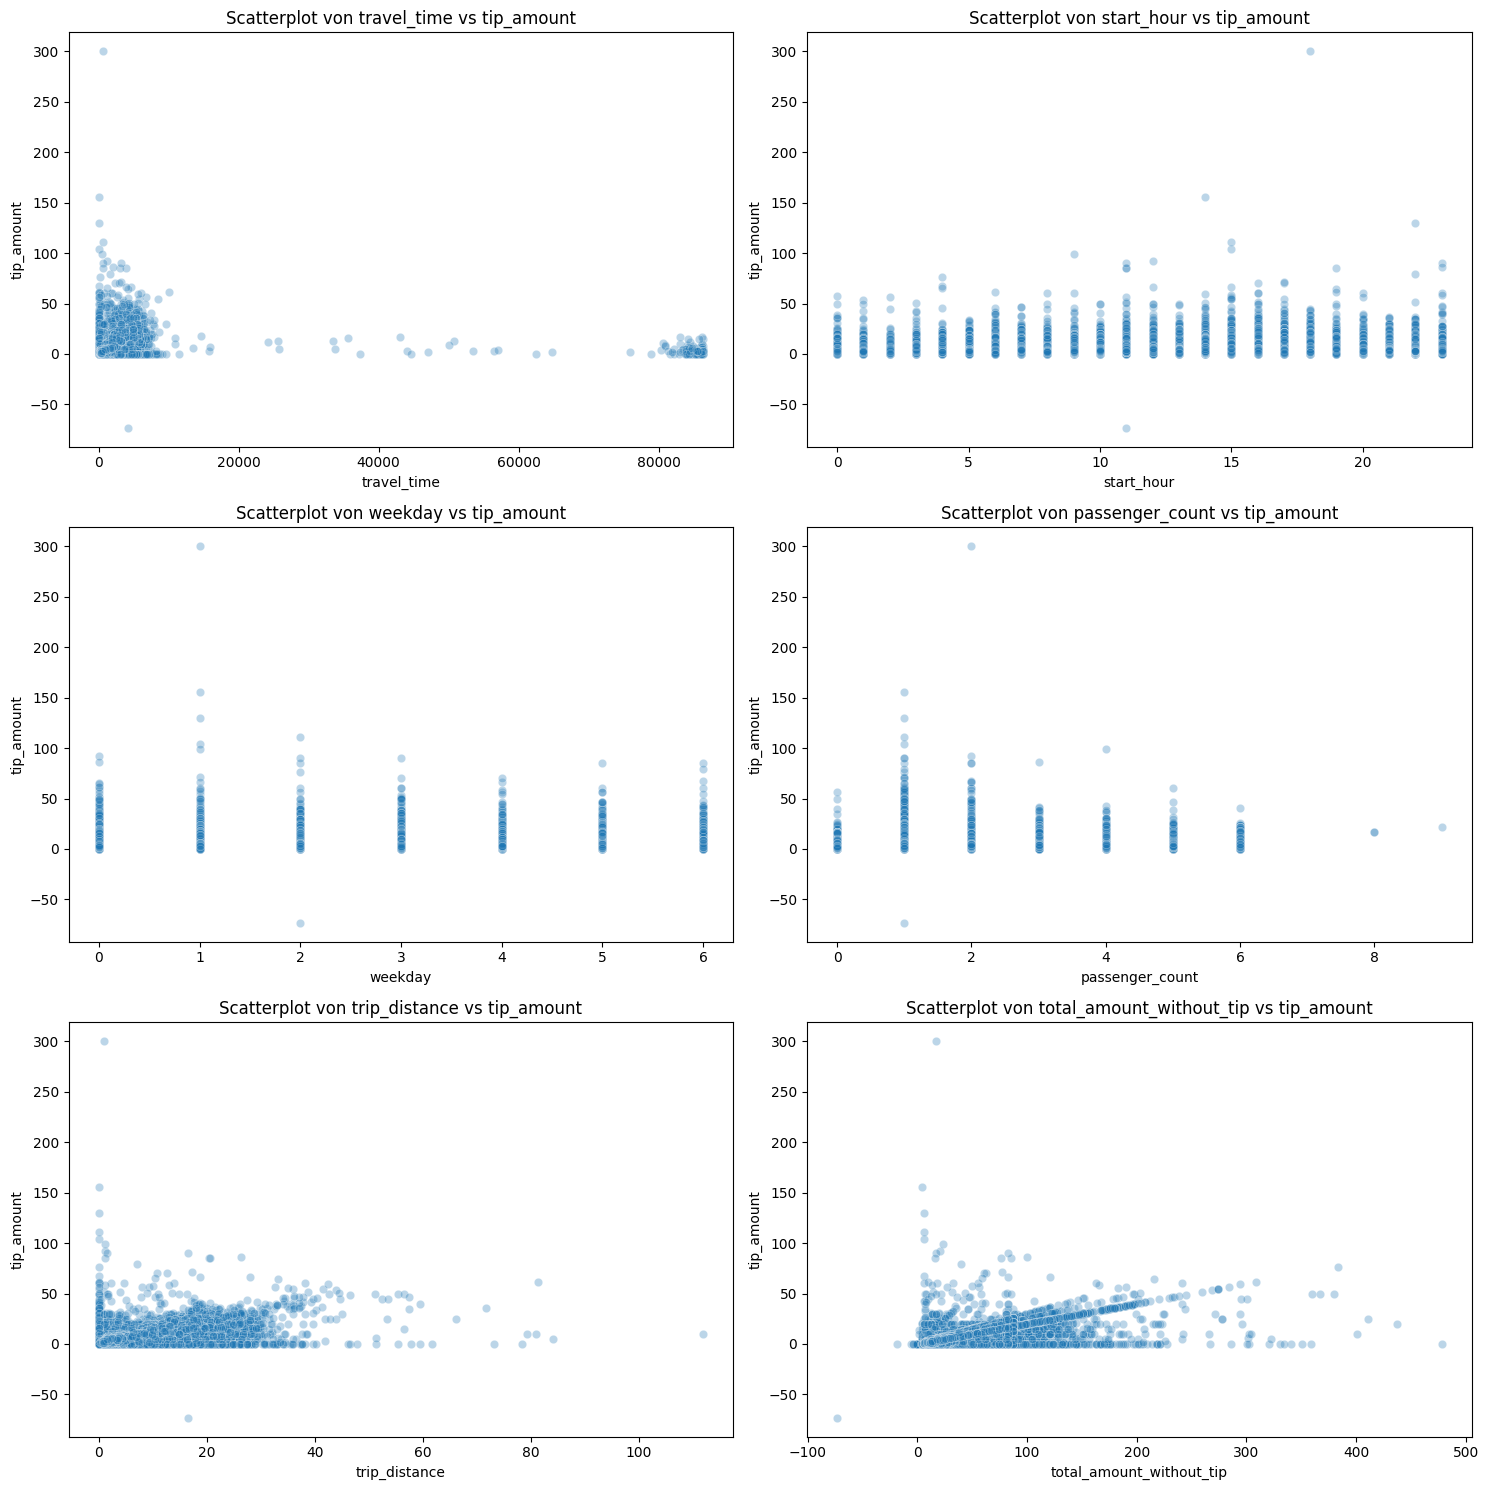

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Funktion zur Visualisierung der Korrelationen
def plot_correlations(data, features, target='tip_amount', cols=2):
    rows = (len(features) + cols - 1) // cols  # Anzahl der benötigten Reihen
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        if data[feature].dtype in [np.float64, np.int64]:
            # Kontinuierliche Variablen: Streudiagramm
            sns.scatterplot(data=data, x=feature, y=target, ax=axes[i], alpha=0.3)
            axes[i].set_title(f'Scatterplot von {feature} vs {target}')
            axes[i].set_xlabel(feature)
            axes[i].set_ylabel(target)
        else:
            # Kategoriale Variablen: Boxplot
            sns.boxplot(data=data, x=feature, y=target, ax=axes[i])
            axes[i].set_title(f'Boxplot von {feature} vs {target}')
            axes[i].set_xlabel(feature)
            axes[i].set_ylabel(target)

    # Entfernen der leeren Subplots
    for i in range(len(features), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

# Features definieren
features = ['travel_time', 'start_hour', 'weekday', 'passenger_count', 'trip_distance', 'total_amount_without_tip']

# Visualisierung der Korrelationen
plot_correlations(sampled_data, features, target='tip_amount', cols=2)


<h1>Lineare Multiple Regression:</h1>

Mean Squared Error (MSE): 7.93
R^2 Score: 0.55
Koeffizienten: [-1.02100313e-05  9.07772461e-03 -1.89788657e-02  2.43197121e-02
  1.13900167e-01  1.33125113e-01]


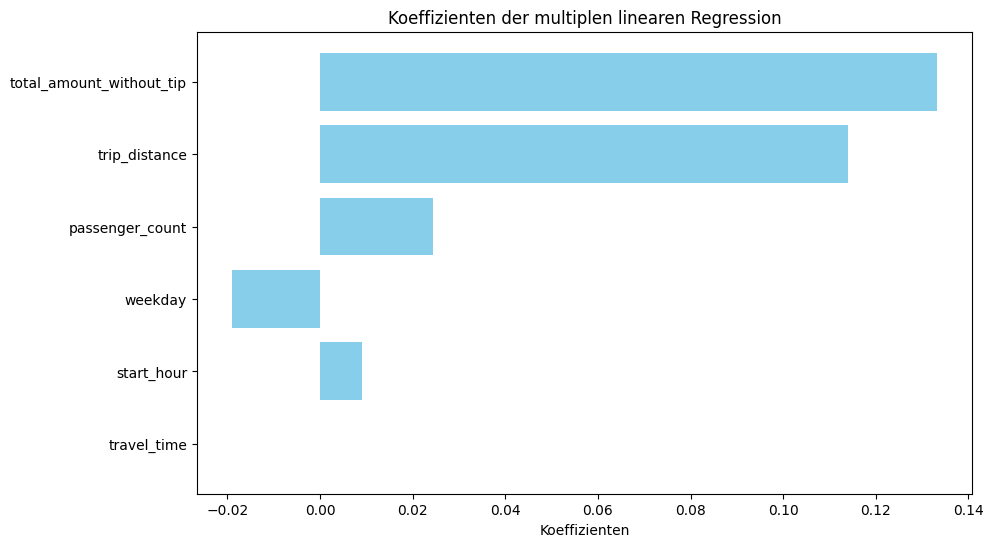

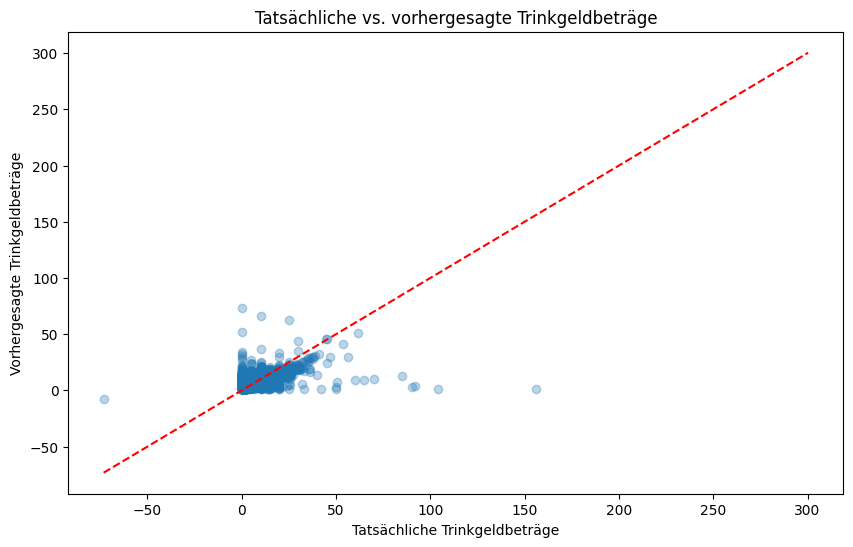

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features und Zielvariable
features = ['travel_time', 'start_hour', 'weekday', 'passenger_count', 'trip_distance', 'total_amount_without_tip']
target = 'tip_amount'

# Daten für die multiple lineare Regression vorbereiten
X = sampled_data[features]
y = sampled_data[target]

# Aufteilen der Daten in Trainings- und Testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Multiples lineares Regressionsmodell erstellen und trainieren
model = LinearRegression()
model.fit(X_train, y_train)

# Vorhersagen auf dem Testset durchführen
y_pred = model.predict(X_test)

# Modellbewertung
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Koeffizienten des Modells ausgeben
coefficients = model.coef_
print("Koeffizienten:", coefficients)

# Visualisierung der Koeffizienten
plt.figure(figsize=(10, 6))
plt.barh(features, coefficients, color='skyblue')
plt.xlabel("Koeffizienten")
plt.title("Koeffizienten der multiplen linearen Regression")
plt.show()

# Visualisierung der Vorhersagen vs. tatsächliche Werte
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Tatsächliche Trinkgeldbeträge")
plt.ylabel("Vorhergesagte Trinkgeldbeträge")
plt.title("Tatsächliche vs. vorhergesagte Trinkgeldbeträge")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.show()


<h1>Random Forest:</h1> 

Mean Squared Error (MSE): 8.20
R^2 Score: 0.54
Feature Importances: [0.12867862 0.05879629 0.0425215  0.02553822 0.10696569 0.63749968]


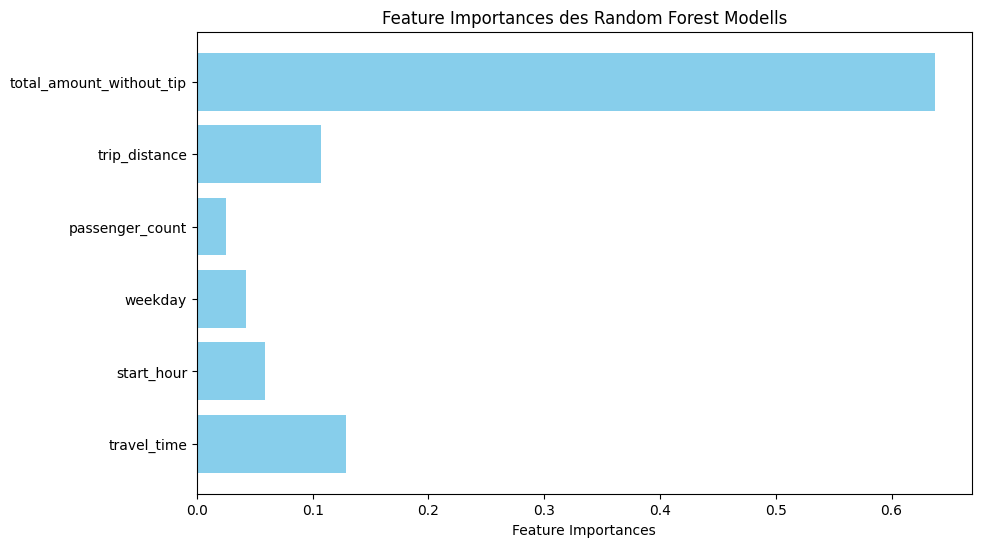

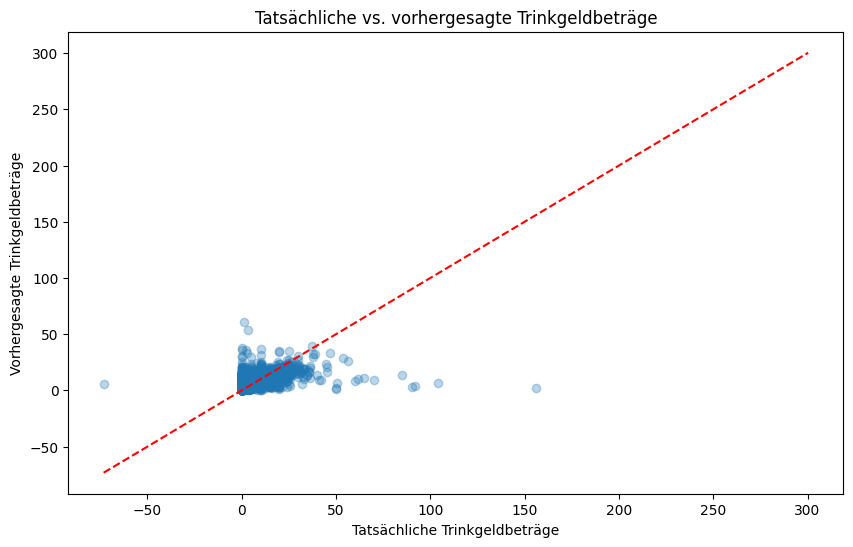

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Features und Zielvariable
features = ['travel_time', 'start_hour', 'weekday', 'passenger_count', 'trip_distance', 'total_amount_without_tip']
target = 'tip_amount'

# Daten für das Random Forest Modell vorbereiten
X = sampled_data[features]
y = sampled_data[target]

# Aufteilen der Daten in Trainings- und Testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Modell erstellen und trainieren
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Vorhersagen auf dem Testset durchführen
y_pred = model.predict(X_test)

# Modellbewertung
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Feature-Importances des Modells ausgeben
importances = model.feature_importances_
print("Feature Importances:", importances)

# Visualisierung der Feature-Importances
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel("Feature Importances")
plt.title("Feature Importances des Random Forest Modells")
plt.show()

# Visualisierung der Vorhersagen vs. tatsächliche Werte
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Tatsächliche Trinkgeldbeträge")
plt.ylabel("Vorhergesagte Trinkgeldbeträge")
plt.title("Tatsächliche vs. vorhergesagte Trinkgeldbeträge")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.show()


<h1>Korrellation der Daten:</h1>

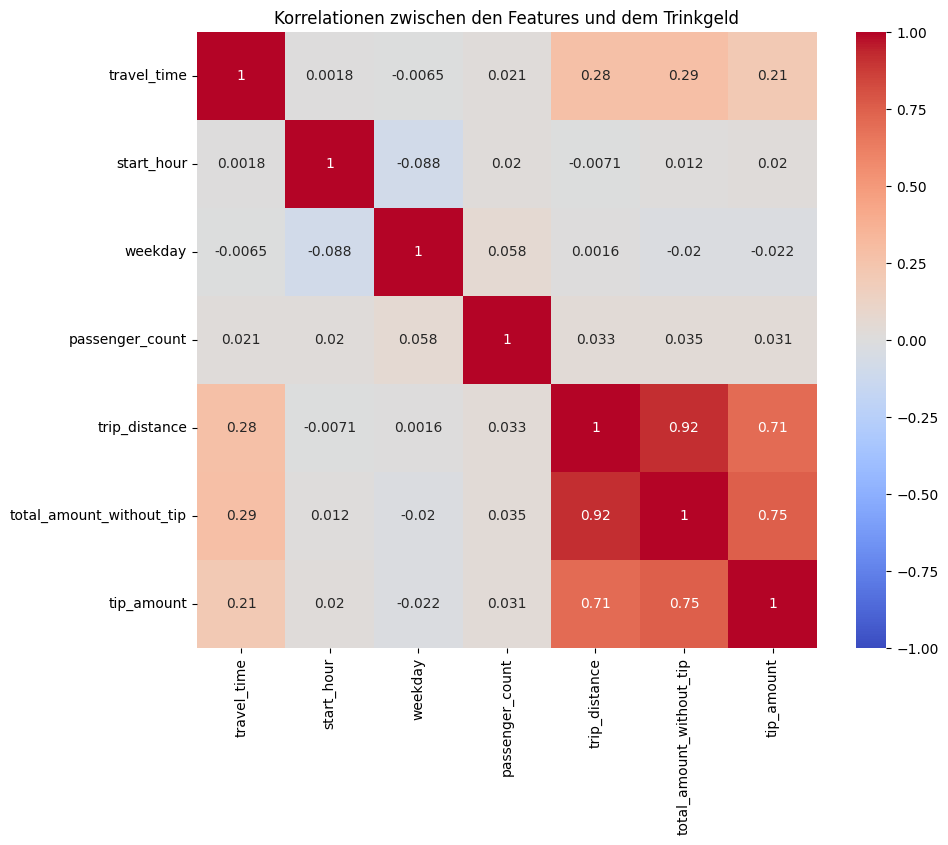

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Features und Zielvariable
features = ['travel_time', 'start_hour', 'weekday', 'passenger_count', 'trip_distance', 'total_amount_without_tip', 'tip_amount']

# Daten für die Heatmap vorbereiten
correlation_matrix = sampled_data[features].corr()

# Heatmap erstellen
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title("Korrelationen zwischen den Features und dem Trinkgeld")
plt.show()
